In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import optimize as opt
import pickle

In [2]:
i = 1591397657

In [3]:
d = pd.read_hdf(str(i)+'.h5', 'data')
s = pd.read_hdf(str(i)+'.h5', 'stored_assignments')

In [4]:
def calc_percentile(val, data):
    return opt.bisect(lambda x: np.percentile(data, x) - val, 0, 100)

In [27]:
def make_plots(idnum, kind, subdirectory='Data/', figsize=(8,6), dpi=400):
    """
    Given the id number of a chain run, creates relevant plots (Utah data format only).
    """
    # Extract the data
    data = pd.read_hdf(str(idnum)+'.h5', 'data')
    n = len(data)
    m = 4
    k = 1
    
    # Set parameters
    common_file_ending = '-'+str(len(data))+'-'+kind+'-'+str(idnum)+'.pdf'

    boxplots = {'Box Plot Sen 2010':   {'title': 'Distribution of Vote Shares in {}-Plan Ensemble'.format(n),
                                        'ylabel': 'Republican Vote Share (Senate 2010)',
                                        'xlabel': 'Sorted US Congressional Districts',
                                        'savetitle': subdirectory+'BoxPlotSen2010'+common_file_ending},
             
            'Box Plot Gov 2010':       {'title': 'Distribution of Vote Shares in {}-Plan Ensemble'.format(n),
                                        'ylabel': 'Republican Vote Share (Gubernatorial 2010)',
                                        'xlabel': 'Sorted US Congressional Districts',
                                        'savetitle': subdirectory+'BoxPlotGov2010'+common_file_ending},
             
            'Violin Plot Sen 2010':    {'title': 'Distribution of Vote Shares in {}-Plan Ensemble'.format(n),
                                        'ylabel': 'Republican Vote Share (Senate 2010)',
                                        'xlabel': 'Sorted US Congressional Districts',
                                        'savetitle': subdirectory+'ViolinPlotSen2010'+common_file_ending},
             
            'Violin Plot Gov 2010':    {'title': 'Distribution of Vote Shares in {}-Plan Ensemble'.format(n),
                                        'ylabel': 'Republican Vote Share (Gubernatorial 2010)',
                                        'xlabel': 'Sorted US Congressional Districts',
                                        'savetitle': subdirectory+'ViolinPlotGov2010'+common_file_ending}
               }
             
    
    metricplots = {'Avg Abs Partisan Dislocation - SEN': {'title': 'Avg Abs Partisan Dislocation in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Avg Abs Partisan Dislocation (Senate 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'AvgAbsPDSen2010'+common_file_ending},
                    'Avg Abs Partisan Dislocation - G': {'title': 'Avg Abs Partisan Dislocation in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Avg Abs Partisan Dislocation (Gubernatorial 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'AvgAbsPDGov2010'+common_file_ending},
                    'Mean Median - SEN': {'title': 'Mean-Median Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Mean-Median Score (Senate 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'MeanMedianSen2010'+common_file_ending},
                    'Mean Median - G': {'title': 'Mean-Median Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Mean-Median Score (Gubernatorial 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'MeanMedianGov2010'+common_file_ending},
                    'Efficiency Gap - SEN': {'title': 'Efficiency Gap in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Efficiency Gap (Senate 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'EfficiencyGapSen2010'+common_file_ending},
                    'Efficiency Gap - G': {'title': 'Efficiency Gap in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Efficiency Gap (Gubernatorial 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'EfficiencyGapGov2010'+common_file_ending},
                    'Partisan Bias - SEN': {'title': 'Partisan Bias Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Partisan Bias Score (Senate 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'PartisanBiasSen2010'+common_file_ending},
                    'Partisan Bias - G': {'title': 'Partisan Bias Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Partisan Bias Score (Gubernatorial 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'PartisanBiasGov2010'+common_file_ending},
                    'Partisan Gini - SEN': {'title': 'Partisan Gini Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Partisan Gini Score (Senate 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'PartisanGiniSen2010'+common_file_ending},
                    'Partisan Gini - G': {'title': 'Partisan Gini Score in a {}-Plan Ensemble'.format(n),
                                                  'xlabel': 'Partisan Gini Score (Gubernatorial 2010)',
                                                  'ylabel': 'Number of Plans',
                                                  'savetitle': subdirectory+'PartisanGiniGov2010'+common_file_ending},
            }
    
    
    # Box plot: Senate 2010
    key = 'Box Plot Sen 2010'
    vote_share_sen10 = pd.DataFrame(list(data.iloc[:, 23:27].values), columns=np.arange(1, m+1))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.axhline(0.5, color="#cccccc")
    vote_share_sen10.boxplot(ax=ax, positions=range(1, m+1), sym='', zorder=1)
    ax.scatter(vote_share_sen10.iloc[0].index, vote_share_sen10.iloc[0], color="r", marker="o", s=25/k, alpha=0.5, zorder=5, label='2012 plan')
    ax.legend(loc='lower right')

    ax.set_title(boxplots[key]['title'])
    ax.set_xlabel(boxplots[key]['xlabel'])
    ax.set_ylabel(boxplots[key]['ylabel'])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([1, 2, 3, 4])
    plt.savefig(boxplots[key]['savetitle'], dpi=dpi, bbox_inches='tight')
    plt.clf()
    
    # Violin plot: Senate 2010
    key = 'Violin Plot Sen 2010'
    d = vote_share_sen10.T.copy()
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.axhline(0.5, color="#cccccc")
    ax.violinplot(d)
    
    ax.hlines(y=d.iloc[:, 0], xmin = np.arange(m)+1-0.2, xmax=np.arange(m)+1+0.2, color='r', lw=2, label='2012 plan')
    ax.legend(loc='lower right')
    for i in range(m):
        plt.text(i+1, d.iloc[i, 0]-0.04, str(np.round(calc_percentile(d.iloc[i, 0], d.iloc[i]),1))+'%', horizontalalignment='center')

    ax.set_title(boxplots[key]['title'])
    ax.set_xlabel(boxplots[key]['xlabel'])
    ax.set_ylabel(boxplots[key]['ylabel'])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([1, 2, 3, 4])
    plt.savefig(boxplots[key]['savetitle'], dpi=dpi, bbox_inches='tight')
    plt.clf()
    
    # Box plot: Governor 2010
    key = 'Box Plot Gov 2010'
    
    vote_share_gov10 = pd.DataFrame(list(data.iloc[:, 27:31].values), columns=np.arange(1, m+1))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.axhline(0.5, color="#cccccc")
    vote_share_gov10.boxplot(ax=ax, positions=range(1, m+1), sym='', zorder=1)
    ax.scatter(vote_share_gov10.iloc[0].index, vote_share_gov10.iloc[0], color="r", marker="o", s=25/k, alpha=0.5, zorder=5, label='2012 plan')
    ax.legend(loc='lower right')

    ax.set_title(boxplots[key]['title'])
    ax.set_xlabel(boxplots[key]['xlabel'])
    ax.set_ylabel(boxplots[key]['ylabel'])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([1, 2, 3, 4])
    plt.savefig(boxplots[key]['savetitle'], dpi=dpi, bbox_inches='tight')
    plt.clf()
    
    # Violin plot: Gov 2010
    key = 'Violin Plot Gov 2010'
    d = vote_share_gov10.T.copy()
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.axhline(0.5, color="#cccccc")
    ax.violinplot(d)
    
    ax.hlines(y=d.iloc[:, 0], xmin = np.arange(m)+1-0.2, xmax=np.arange(m)+1+0.2, color='r', lw=2, label='2012 plan')
    ax.legend(loc='lower right')
    for i in range(m):
        plt.text(i+1, d.iloc[i, 0]-0.04, str(np.round(calc_percentile(d.iloc[i, 0], d.iloc[i]),1))+'%', horizontalalignment='center')

    ax.set_title(boxplots[key]['title'])
    ax.set_xlabel(boxplots[key]['xlabel'])
    ax.set_ylabel(boxplots[key]['ylabel'])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([1, 2, 3, 4])
    plt.savefig(boxplots[key]['savetitle'], dpi=dpi, bbox_inches='tight')
    plt.clf()
    
    # Construct plots for the various metrics
    for key in metricplots.keys():
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        metric = pd.Series(data[key])
        metric.hist(bins=50)
        ax.axvline(x=metric[0], color='r', lw=2, label='2012 plan, '+str(np.round(calc_percentile(metric[0], metric),1))+'%')
        ax.set_title(metricplots[key]['title'])
        ax.set_xlabel(metricplots[key]['xlabel'])
        ax.set_ylabel(metricplots[key]['ylabel'])
        ax.legend(loc='upper right')
        plt.savefig(metricplots[key]['savetitle'], dpi=dpi, bbox_inches='tight')
        plt.clf()
        

In [28]:
make_plots(i, 'flip-uniform')

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

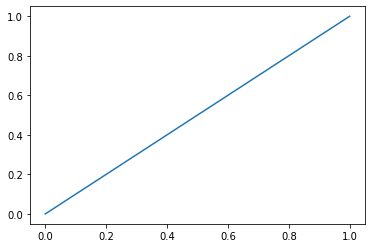

In [30]:
subdirectory = 'Data/'
domain = np.linspace(0, 1, 100)
plt.plot(domain, domain)
plt.savefig(subdirectory+ 'test2.png', dpi=300, bbox_inches='tight')

In [15]:
def f(start, a, b, c):
    return a+b+c

In [14]:
d = {'a':1, 'b':2}
g = {'c':3}

In [17]:
f(start=1, **d, **g)

6

In [5]:
*d

SyntaxError: can't use starred expression here (<ipython-input-5-7b1d5260de7b>, line 4)

In [19]:
5//14

0